In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces_all = fetch_olivetti_faces()

In [4]:
faces = faces_all.images[faces_all.target == 0]

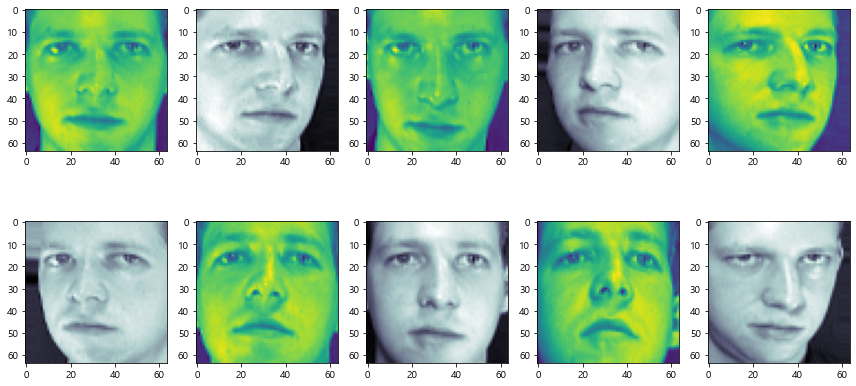

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
n = 2
m = 5
for i in range(n):
    for j in range(m):
        k = i * m + j
        ax = fig.add_subplot(n, m ,k+1)
        if k%2 == 0:
            ax.imshow(faces[k])
        else:
            ax.imshow(faces[k], cmap=plt.cm.bone)
plt.tight_layout()
plt.show()

In [8]:
faces[0] = faces[0] * 1000

In [9]:
faces[0] = np.round(faces[0])

In [10]:
faces[0][:3]

array([[310., 368., 417., 442., 529., 607., 657., 678., 690., 686., 702.,
        698., 694., 698., 690., 694., 690., 698., 702., 702., 698., 707.,
        711., 719., 727., 756., 773., 777., 777., 756., 760., 781., 760.,
        769., 756., 740., 744., 740., 744., 719., 719., 715., 719., 719.,
        723., 727., 736., 715., 723., 719., 715., 711., 702., 707., 698.,
        678., 657., 632., 566., 525., 446., 372., 331., 306.],
       [343., 405., 438., 471., 554., 624., 669., 686., 690., 686., 694.,
        690., 698., 702., 698., 694., 707., 711., 711., 715., 711., 702.,
        719., 727., 736., 760., 777., 785., 781., 777., 773., 789., 785.,
        773., 764., 748., 744., 740., 736., 719., 719., 719., 719., 719.,
        719., 723., 727., 719., 727., 719., 719., 723., 707., 702., 698.,
        674., 657., 636., 603., 512., 442., 372., 339., 314.],
       [343., 417., 450., 512., 574., 645., 678., 690., 694., 694., 698.,
        690., 702., 707., 707., 702., 707., 711., 711., 715.

In [11]:
note = faces[0][:3]

In [12]:
note1 = list(note[0])

In [13]:
import numpy as np
from scipy.io.wavfile import write
from scipy import signal
import os

samplerate = 44100 #Frequecy in Hz

def get_cubicwave(chords, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    # wave = amplitude * (np.sin(2 * np.pi * freq * t) + np.cos(2 * np.pi * freq * t))
    # wave = signal.sawtooth(np.sin(2 * np.pi * freq * t))
    wave =  amplitude * signal.cubic(np.sin(2 * np.pi * chords * t)) 
    noise = np.random.uniform(-1, 1, len(t))*1
    wave += noise
    return wave

In [14]:
len(note1)

64

In [15]:
def get_song_data(music_notes):
    
    song = []
    for i, note in enumerate(music_notes):
        song.append(get_cubicwave(note, duration=0.5))
    song = np.concatenate(song)
    return song

data = get_song_data(list(note1))
data = data * (16300/np.max(data))

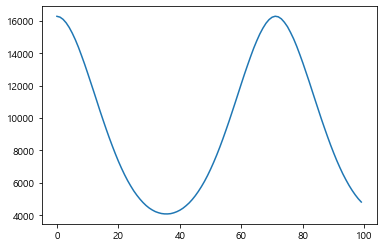

In [16]:
plt.plot(data[:100])

In [17]:
write('pic_to_music.wav', samplerate, data.astype(np.int16))
# play wav file
os.system("pic_to_music.wav")

0